In [ ]:
#import pydytuesday
import pandas as pd
#pydytuesday.get_date('2025-05-20')

# Option 2: Read directly from GitHub 

water_quality = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-05-20/water_quality.csv')
weather = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-05-20/weather.csv')

In [39]:
water_quality['date'] = pd.to_datetime(water_quality['date'])
weather['date'] = pd.to_datetime(weather['date'])

# Save the DataFrames to CSV files
water_quality.to_csv('water_quality.csv', index=False)
weather.to_csv('weather.csv', index=False)
water_quality.sample(10)

,region,council,beach,date,time,enterococci,water_temperature,conductivity,latitude,longitude,month,season,year
89531,Sydney Harbour,Lane Cove Council,Greenwich Baths,2000-07-12,11:16:00,0.0,NaN,NaN,-33.841760,151.182900,7,Winter,2000
3642,Sydney Harbour,Mosman Municipal Council,Chinamans Beach,2024-04-30,10:07:00,1.0,20.0,50600.0,-33.814094,151.248971,4,Autumn,2024
72005,Sydney Harbour,Mosman Municipal Council,Edwards Beach,2005-01-04,10:48:00,82.0,NaN,NaN,-33.821380,151.252830,1,Summer,2005
8628,Sydney Harbour,Inner West Council,Dawn Fraser Pool,2023-01-10,11:53:00,5.0,23.0,49100.0,-33.853237,151.172823,1,Summer,2023
123128,Northern Sydney,Northern Beaches Council,Dee Why Beach,1993-02-08,NaN,14.0,NaN,NaN,-33.753299,151.297338,2,Summer,1993
123053,Southern Sydney,Sutherland Shire Council,Boat Harbour,1993-02-10,NaN,34.0,NaN,NaN,-34.038723,151.200127,2,Summer,1993
44993,Sydney City,Randwick City Council,Coogee Beach,2012-03-30,09:04:00,4.0,20.0,NaN,-33.920760,151.258170,3,Autumn,2012
88993,Sydney Harbour,Mosman Municipal Council,Balmoral Baths,2000-08-29,10:10:00,4.0,NaN,NaN,-33.826888,151.253476,8,Winter,2000
8609,Sydney Harbour,Northern Beaches Council,Davidson Reserve,2023-01-10,09:44:00,4.0,24.0,37000.0,-33.767929,151.200343,1,Summer,2023
3104,Southern Sydney,Sutherland Shire Council,Greenhills Beach,2024-07-08,08:03:00,2.0,16.0,52400.0,-34.034790,151.184180,7,Winter,2024


In [48]:
weather.sample(10)

,date,max_temp_C,min_temp_C,precipitation_mm,latitude,longitude
2320,1997-05-09,15.6,11.7,0.0,-33.848858,151.19551
9924,2018-03-04,24.3,19.8,0.5,-33.848858,151.19551
9727,2017-08-19,14.9,6.0,0.0,-33.848858,151.19551
11980,2023-10-20,24.1,14.8,0.0,-33.848858,151.19551
9758,2017-09-19,23.3,8.6,0.0,-33.848858,151.19551
11271,2021-11-10,21.1,17.4,7.3,-33.848858,151.19551
8763,2014-12-29,26.8,20.0,0.0,-33.848858,151.19551
7027,2010-03-29,27.8,20.6,14.9,-33.848858,151.19551
1879,1996-02-23,21.7,18.2,1.6,-33.848858,151.19551
4170,2002-06-02,15.3,11.1,0.5,-33.848858,151.19551


In [68]:
common_dates = set(weather['date']).intersection(set(water_quality['date']))
print(f'Number of common dates: {len(common_dates)}')

Number of common dates: 5175


In [ ]:
# rename columns for clarity
water_quality.rename(columns={
    'swim_site': 'beach',
    'enterococci_cfu_100ml': 'enterococci',
    'water_temperature_c': 'water_temperature',
    'conductivity_ms_cm': 'conductivity'}, inplace=True)

# Which swim sites consistently have high enterococci levels?
high_enterococci_sites = water_quality[water_quality['enterococci'] > 104].groupby('beach').size().reset_index(name='count')
high_enterococci_sites = high_enterococci_sites.sort_values(by='count', ascending=False)
high_enterococci_sites.head(10)

,beach,count
4,Boat Harbour,513
18,Darling Harbour,359
37,Malabar Beach,339
19,Davidson Reserve,266
28,Greenhills Beach,258
66,Tambourine Bay,227
17,Coogee Beach,216
55,Queenscliff Beach,213
60,South Cronulla Beach,207
76,Woolwich Baths,201


In [55]:
# How does water quality vary by season or month?
water_quality['month'] = water_quality['date'].dt.month

# Function to map month to season
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Summer'
    elif month in [3, 4, 5]:
        return 'Autumn'
    elif month in [6, 7, 8]:
        return 'Winter'
    else:
        return 'Spring'

water_quality['season'] = water_quality['month'].apply(month_to_season)
seasonal_quality = water_quality.groupby(['season', 'beach']).agg({'enterococci': 'mean',
                                                                      'water_temperature': 'mean',
                                                                      'conductivity': 'mean'}).reset_index()
seasonal_quality = seasonal_quality.sort_values(by='enterococci', ascending=False)
seasonal_quality.head(10)


,season,beach,enterococci,water_temperature,conductivity
66,Autumn,Tambourine Bay,3326.583120,21.188406,42973.584416
76,Autumn,Woolwich Baths,2430.580247,21.306569,44975.732026
75,Autumn,Woodford Bay,2375.720988,21.395349,45903.777778
57,Autumn,Sangrado Baths,1173.320574,20.222222,49050.000000
151,Spring,Wentworth Falls Lake - Jetty,855.682927,18.444444,1980.250000
129,Spring,Northbridge Baths,750.720812,19.765152,51134.905660
145,Spring,Tambourine Bay,729.519582,19.819549,47416.469136
18,Autumn,Darling Harbour,665.755319,20.889764,45161.006579
35,Autumn,Little Sirius Cove,583.040000,20.305556,54505.636364
19,Autumn,Davidson Reserve,573.377551,21.266667,41097.496732


In [12]:
# How does weather affect water quality?
merged_data = pd.merge(water_quality, weather, on='date', how='left')
merged_data_clean = merged_data.dropna(subset=['enterococci', 'precipitation_mm', 'water_temperature', 'conductivity'])
merged_data_clean = merged_data_clean.copy()
merged_data_clean['month'] = pd.to_datetime(merged_data_clean['date']).dt.month
# Function to map month to season
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Summer'
    elif month in [3, 4, 5]:
        return 'Autumn'
    elif month in [6, 7, 8]:
        return 'Winter'
    else:
        return 'Spring'

merged_data_clean['season'] = merged_data_clean['month'].apply(month_to_season)
seasonal_quality = merged_data_clean.groupby(['season', 'beach']).agg({'enterococci': 'mean',
                                                                        'precipitation_mm': 'mean',
                                                                        'water_temperature': 'mean',
                                                                        'conductivity': 'mean'}).reset_index()
seasonal_quality = seasonal_quality.sort_values(by='enterococci', ascending=False)
seasonal_quality.head(30)

,season,beach,enterococci,precipitation_mm,water_temperature,conductivity
222,Summer,Wentworth Falls Lake - Jetty,647.389610,3.261039,21.597403,697.298701
230,Winter,Balmoral Baths,603.156250,2.037500,16.000000,51297.562500
70,Autumn,Wentworth Falls Lake - Jetty,531.600000,2.080000,20.100000,54.200000
76,Autumn,Yosemite Creek - Minnehaha Falls,437.875000,2.350000,14.250000,77.375000
18,Autumn,Darling Harbour,367.627273,4.210909,20.945455,43310.827273
276,Winter,Northbridge Baths,347.875000,2.043750,15.281250,49257.750000
9,Autumn,Callan Park Seawall,347.000000,5.140323,21.274194,44500.032258
146,Spring,Wentworth Falls Lake - Jetty,339.481481,4.892593,18.481481,2051.629630
75,Autumn,Yarramundi Reserve,309.611111,3.091667,19.000000,93.500000
258,Winter,Greenwich Baths,307.121212,2.178788,14.787879,49586.757576


In [67]:
merged_data.sample(10)

,region,council,beach,date,time,enterococci,water_temperature,conductivity,latitude_x,longitude_x,month,season,year,max_temp_C,min_temp_C,precipitation_mm,latitude_y,longitude_y
30968,Northern Sydney,Northern Beaches Council,North Steyne Beach,2016-08-15,07:15:00,1.0,17.0,54300.0,-33.790990,151.288010,8,Winter,2016,18.4,9.3,0.0,-33.848858,151.19551
81702,Sydney Harbour,City of Canada Bay Council,Cabarita Beach,2002-07-15,08:40:00,2.0,13.0,NaN,-33.841448,151.118630,7,Winter,2002,15.6,6.2,0.0,-33.848858,151.19551
1428,Sydney City,Randwick City Council,Gordons Bay (East),2024-12-20,08:03:00,0.0,21.0,53400.0,-33.915646,151.264558,12,Summer,2024,25.4,15.8,0.0,-33.848858,151.19551
118889,Southern Sydney,Sutherland Shire Council,Elouera Beach,1993-10-01,NaN,55.0,NaN,NaN,-34.046610,151.159660,10,Spring,1993,25.1,16.5,4.3,-33.848858,151.19551
96995,Northern Sydney,Northern Beaches Council,South Steyne Beach,1998-08-31,11:23:00,18.0,NaN,NaN,-33.798890,151.290300,8,Winter,1998,18.7,10.6,0.0,-33.848858,151.19551
94259,Sydney Harbour,Northern Beaches Council,Little Manly Cove,1999-04-30,10:08:00,292.0,NaN,NaN,-33.807232,151.286808,4,Autumn,1999,16.7,13.6,4.9,-33.848858,151.19551
113922,Southern Sydney,Sutherland Shire Council,South Cronulla Beach,1994-07-12,NaN,2.0,NaN,NaN,-34.055497,151.155347,7,Winter,1994,17.2,9.5,0.2,-33.848858,151.19551
108876,Sydney Harbour,Inner West Council,Dawn Fraser Pool,1995-10-24,10:05:00,26.0,NaN,NaN,-33.853237,151.172823,10,Spring,1995,17.8,12.5,0.0,-33.848858,151.19551
61877,Sydney Harbour,Inner West Council,Dawn Fraser Pool,2007-07-24,08:06:00,0.0,NaN,NaN,-33.853237,151.172823,7,Winter,2007,16.4,7.7,0.0,-33.848858,151.19551
17697,Northern Sydney,Northern Beaches Council,Queenscliff Beach,2020-06-05,07:20:00,2.0,17.0,54800.0,-33.786890,151.288740,6,Winter,2020,16.6,5.9,0.0,-33.848858,151.19551


C:\Users\ipekt\AppData\Local\Temp\ipykernel_18120\823691092.py:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


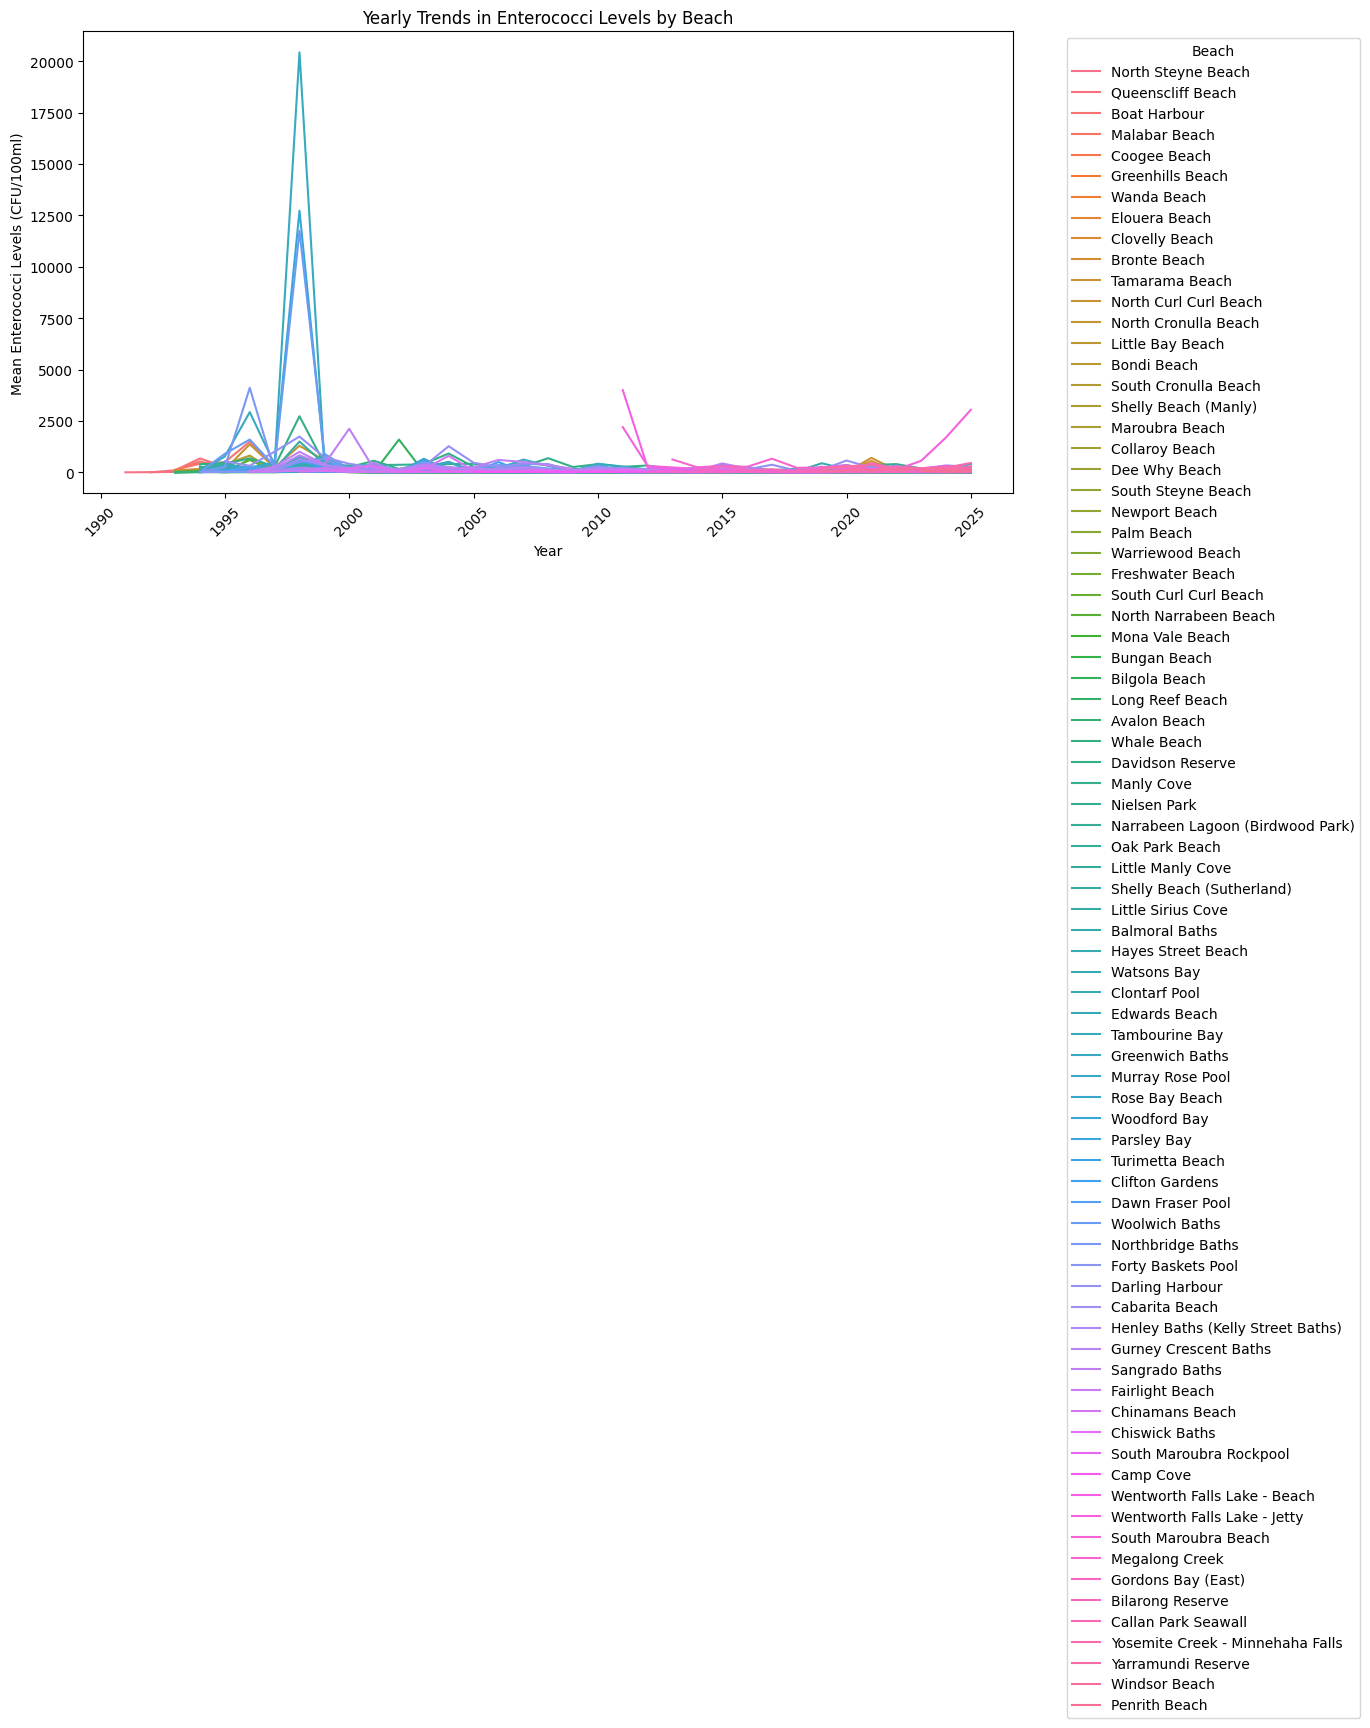

In [ ]:
# Are there noticeable improvements or declines in water quality over the years?

water_quality['year'] = water_quality['date'].dt.year
yearly_trends = water_quality.groupby(['year', 'beach']).agg({
    'enterococci': 'mean',
}).reset_index()
yearly_trends = yearly_trends.sort_values(by=['year', 'enterococci'], ascending=[True, False])
yearly_trends.head(10)
yearly_trends.tail(10)
# Visualizing the trends
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_trends, x='year', y='enterococci', hue='beach')
plt.title('Yearly Trends in Enterococci Levels by Beach')
plt.xlabel('Year')
plt.ylabel('Mean Enterococci Levels (CFU/100ml)')
plt.xticks(rotation=45)
plt.legend(title='Beach', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\ipekt\AppData\Local\Temp\ipykernel_18120\1433094837.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=council_data, x='council', y='enterococci', palette='viridis')


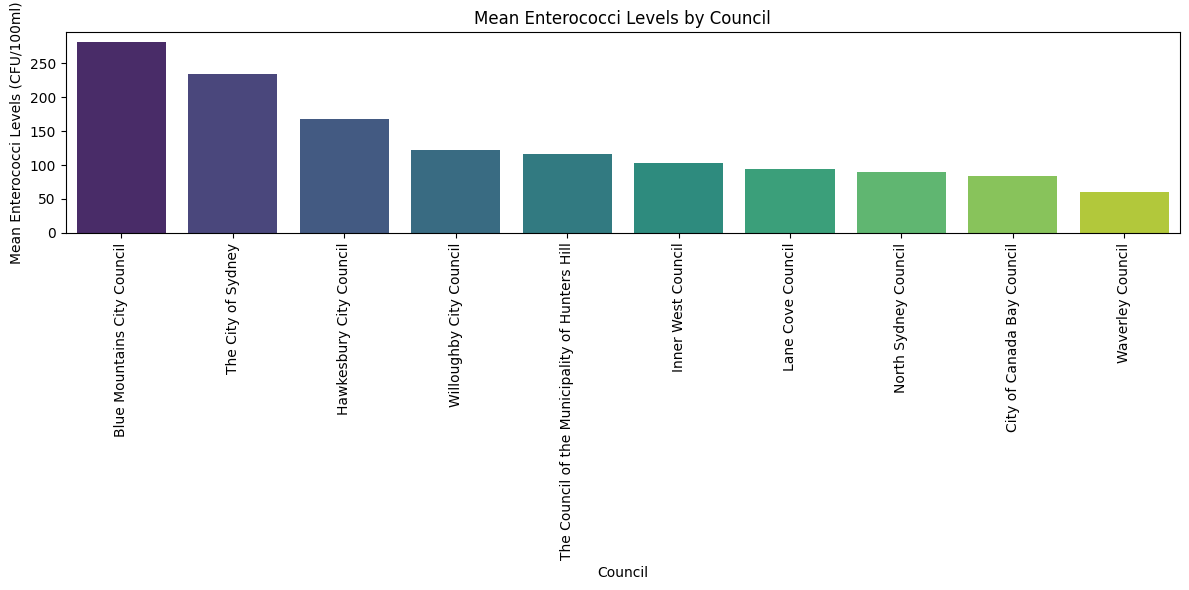

In [ ]:
# What is the distribution of enterococci levels across different councils?
council_data = merged_data_clean.groupby('council').agg({'enterococci': 'mean'}).reset_index().sort_values(by='enterococci', ascending=False).head(10)
council_data
# Visualizing the distribution of enterococci levels across councils
plt.figure(figsize=(12, 6))
sns.barplot(data=council_data, x='council', y='enterococci', palette='viridis')
plt.title('Mean Enterococci Levels by Council')
plt.xlabel('Council')
plt.ylabel('Mean Enterococci Levels (CFU/100ml)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

C:\Users\ipekt\AppData\Local\Temp\ipykernel_18120\237064084.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_data, x='region', y='enterococci', palette='viridis')


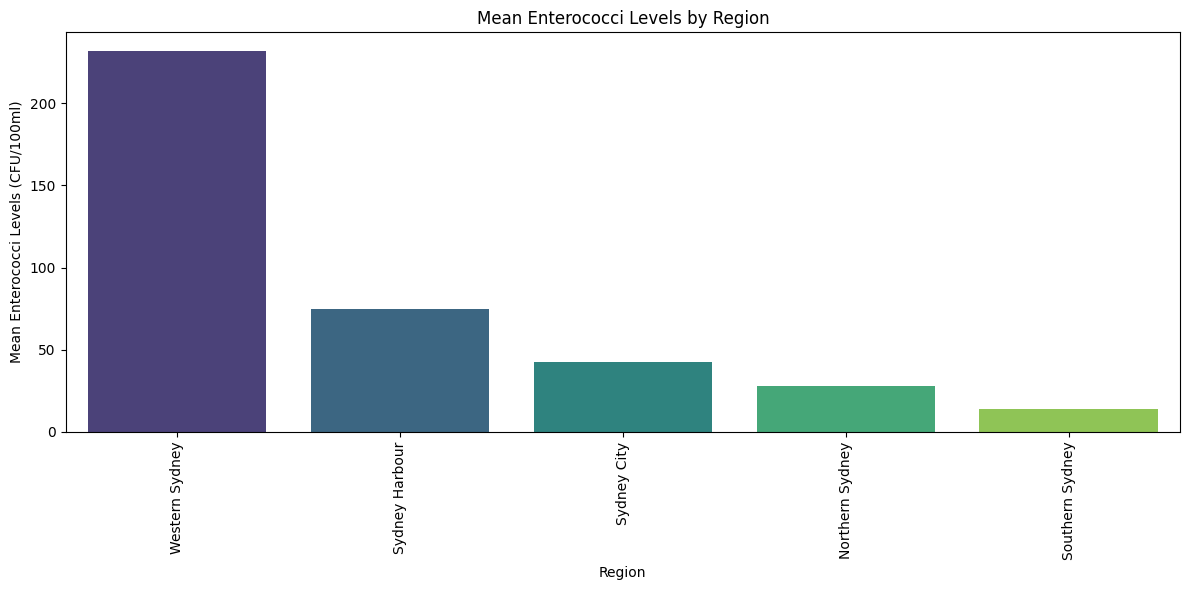

In [24]:
# What is the distribution of enterococci levels across different regions?
region_data = merged_data_clean.groupby('region').agg({'enterococci': 'mean'}).reset_index().sort_values(by='enterococci', ascending=False).head(10)
# Visualizing the distribution of enterococci levels across regions
plt.figure(figsize=(12, 6))
sns.barplot(data=region_data, x='region', y='enterococci', palette='viridis')
plt.title('Mean Enterococci Levels by Region')
plt.xlabel('Region')
plt.ylabel('Mean Enterococci Levels (CFU/100ml)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:

# Does water temperature or conductivity correlate with enterococci levels?

# Explore whether warmer or more saline water impacts bacteria levels


In [ ]:
# Do sites near the coast vs. inland show different quality levels?
# Compare water quality between coastal and inland sites
# Create a new column to classify sites as coastal or inland
coastal_sites = ['Bondi Beach', 'Manly Beach', 'Cronulla Beach', 'Coogee Beach']
merged_data_clean['site_type'] = merged_data_clean['beach'].apply(lambda x: 'Coastal' if x in coastal_sites else 'Inland')
# Group by site type and calculate mean enterococci levels


In [25]:
# Do certain months with high rainfall consistently have worse water quality?
rainfall_quality = merged_data_clean[merged_data_clean['precipitation_mm'] > 10].groupby('month').agg({
    'enterococci': 'mean',
    'precipitation_mm': 'mean',
    'water_temperature': 'mean',
    'conductivity': 'mean'
}).reset_index()
rainfall_quality = rainfall_quality.sort_values(by='enterococci', ascending=False)
rainfall_quality.head(10)

,month,enterococci,precipitation_mm,water_temperature,conductivity
1,2,355.341737,20.749020,22.338936,48356.408964
2,3,258.669456,25.231799,22.089958,47718.562762
0,1,168.443836,21.847123,22.430137,47685.345205
6,7,166.145299,20.629060,16.658120,44417.589744
10,11,134.902098,17.995455,19.926573,49844.031469
11,12,110.351562,20.205078,20.160156,51075.152344
9,10,80.218182,21.576364,17.357576,48971.296970
3,4,74.152632,28.315263,20.373684,48251.515789
4,5,33.544118,19.622794,20.610294,51700.580882
5,6,27.915094,18.520755,16.849057,53002.264151


In [27]:
merged_data_clean.head()

,region,council,beach,date,time,enterococci,water_temperature,conductivity,latitude_x,longitude_x,month,season,year,max_temp_C,min_temp_C,precipitation_mm,latitude_y,longitude_y
0,Western Sydney,Hawkesbury City Council,Windsor Beach,2025-04-28,11:00:00,620.0,20.0,248.0,-33.604483,150.817039,4,Autumn,2025,20.4,14.2,1.8,-33.848858,151.19551
1,Sydney Harbour,North Sydney Council,Hayes Street Beach,2025-04-28,11:40:00,64.0,21.0,45250.0,-33.841715,151.219382,4,Autumn,2025,20.4,14.2,1.8,-33.848858,151.19551
2,Sydney Harbour,Willoughby City Council,Northbridge Baths,2025-04-28,10:54:00,160.0,21.0,48930.0,-33.806043,151.222754,4,Autumn,2025,20.4,14.2,1.8,-33.848858,151.19551
3,Sydney Harbour,Northern Beaches Council,Fairlight Beach,2025-04-28,09:28:00,54.0,21.0,52700.0,-33.800731,151.274778,4,Autumn,2025,20.4,14.2,1.8,-33.848858,151.19551
4,Western Sydney,Hawkesbury City Council,Yarramundi Reserve,2025-04-28,10:35:00,720.0,18.0,64.0,-33.609123,150.697886,4,Autumn,2025,20.4,14.2,1.8,-33.848858,151.19551


In [28]:
# Are heatwaves or storms followed by poor swim conditions?
# Identify heatwaves or storms in the weather data
# Create a new column to classify days as heatwave or storm based on temperature and precipitation
heatwave_threshold = 35  # Example threshold for heatwave
storm_threshold = 20  # Example threshold for storm (high precipitation)
merged_data_clean['event'] = merged_data_clean.apply(
    lambda row: 'Heatwave' if row['max_temp_C'] > heatwave_threshold else ('Storm' if row['precipitation_mm'] > storm_threshold else 'Normal'),
    axis=1
)
# Group by event type and calculate mean enterococci levels
event_quality = merged_data_clean.groupby('event').agg({
    'enterococci': 'mean',
    'water_temperature': 'mean',
    'conductivity': 'mean'
}).reset_index()
event_quality = event_quality.sort_values(by='enterococci', ascending=False)
event_quality.head(10)

,event,enterococci,water_temperature,conductivity
2,Storm,148.465674,20.656741,48385.065343
1,Normal,43.427521,19.909275,51549.844524
0,Heatwave,22.417012,22.068465,53138.917012


In [30]:
# Can we predict enterococci levels from weather variables?
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Prepare the data for modeling
X = merged_data_clean[['max_temp_C', 'min_temp_C', 'precipitation_mm', 'water_temperature', 'conductivity']]
y = merged_data_clean['enterococci']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 72869.21532504537
R-squared: -0.01300838738876009
